# 1D Heat Equation – Implicit Scheme (Crank–Nicolson)

We solve the 1D heat equation:

$$
\frac{\partial u}{\partial t} = \alpha \frac{\partial^2 u}{\partial x^2}, \quad 0 < x < L, \quad t > 0
$$

---

## Crank–Nicolson Scheme

The Crank–Nicolson method is implicit and uses averaging between current and next time step:

$$
\frac{u_i^{n+1} - u_i^n}{\Delta t} = \frac{\alpha}{2 (\Delta x)^2} \Big[ u_{i+1}^{n} - 2u_i^n + u_{i-1}^n + u_{i+1}^{n+1} - 2u_i^{n+1} + u_{i-1}^{n+1} \Big]
$$

Rewriting, we get a tridiagonal system:

$$
-\sigma u_{i-1}^{n+1} + (1+2\sigma) u_i^{n+1} - \sigma u_{i+1}^{n+1} = \sigma u_{i-1}^{n} + (1-2\sigma) u_i^{n} + \sigma u_{i+1}^{n}
$$

where $\sigma = \frac{\alpha \Delta t}{2 (\Delta x)^2}$.

- Solve this system using Thomas algorithm (tridiagonal solver).  
- Boundary conditions: $(u(0,t) = u(L,t) = 0$  
- Initial condition: $u(x,0) = \sin(\pi x / L)$

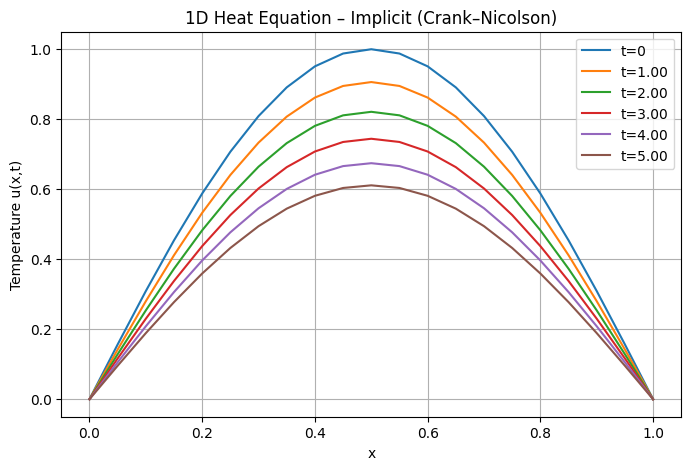

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
L = 1.0
alpha = 0.01
Nx = 20
dx = L / Nx
dt = 0.05
Nt = 100

x = np.linspace(0, L, Nx+1)
u = np.sin(np.pi * x / L)
u_new = u.copy()

sigma = alpha * dt / (2*dx**2)

# Tridiagonal matrix coefficients
a = -sigma * np.ones(Nx-1)
b = (1 + 2*sigma) * np.ones(Nx-1)
c = -sigma * np.ones(Nx-1)

# Function: Thomas algorithm
def thomas_algorithm(a, b, c, d):
    n = len(d)
    c_ = np.zeros(n-1)
    d_ = np.zeros(n)
    x = np.zeros(n)
    
    c_[0] = c[0] / b[0]
    d_[0] = d[0] / b[0]
    
    for i in range(1, n-1):
        denom = b[i] - a[i-1]*c_[i-1]
        c_[i] = c[i] / denom
        d_[i] = (d[i] - a[i-1]*d_[i-1]) / denom
    d_[n-1] = (d[n-1] - a[n-2]*d_[n-2]) / (b[n-1] - a[n-2]*c_[n-2])
    
    # Back substitution
    x[-1] = d_[n-1]
    for i in range(n-2, -1, -1):
        x[i] = d_[i] - c_[i]*x[i+1]
    return x

# Plot initial condition
plt.figure(figsize=(8,5))
plt.plot(x, u, label="t=0")

# Time-stepping
for n in range(1, Nt+1):
    d = sigma*u[:-2] + (1-2*sigma)*u[1:-1] + sigma*u[2:]
    u_new[1:-1] = thomas_algorithm(a, b, c, d)
    u[:] = u_new[:]
    
    if n % 20 == 0:
        plt.plot(x, u, label=f"t={n*dt:.2f}")

plt.xlabel("x")
plt.ylabel("Temperature u(x,t)")
plt.title("1D Heat Equation – Implicit (Crank–Nicolson)")
plt.legend()
plt.grid(True)
plt.show()

## Conclusion

- The Crank–Nicolson scheme is unconditionally stable.  
- Unlike the explicit method, we can use larger time steps without instability.  
- Accuracy is second-order in time and space.  
- Implicit schemes require solving a linear system at each step, here efficiently done with the Thomas algorithm.  
- Comparing with the explicit method, implicit schemes are more robust for stiff problems.